# Introduction to Python for astronomy
Gilles Landais : gilles.landais@unistra.fr

## lesson 5:
- matplotlib library
- create a simple class
- connect a database
--------------------------------

    
## The matplotlib library
![Image of matplotlib](https://matplotlib.org/_static/logo2.png)
Free licence (PSF Python) to generate 2D-3D plots.. 
matplotlib is compatible with Numpy

see examples and documentation:  http://matplotlib.org/gallery.html

### First examples


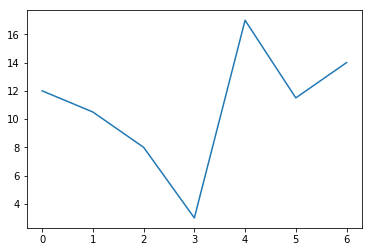

In [1]:
import matplotlib.pyplot as plt

list = (12,10.5,8,3,17,11.5,14)

plt.plot(list) # make the plot
plt.show() # matplotlib visualization

#save in a file
plt.savefig("result.png")

#### An other example using Numpy

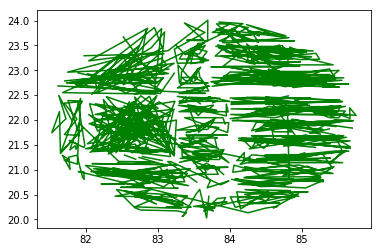

In [2]:
import numpy as np

# get data using Numpy
url = 'http://vizier.u-strasbg.fr/viz-bin/asu-tsv?-source=I/259/tyc2&-out=RAmdeg,DEmdeg,VTmag&-c=M1&-c.rd=2&-out.max=1000'

data = np.genfromtxt(url, dtype=[('ra','f8'),('dec','f8'),('vmag','f8')], skip_header=35, delimiter='\t')

# plot the result
plt.plot(data['ra'], data['dec'], "g-")
plt.show()

#### Output parameter: point, line,  scatter ...
The 2d parameter of the *plot* function drives the style of the graph:

Parameter value | Description
------------ | ------------
- | a (solid) line
o | a point
. | small point
* | a star
b,g,r | the colors 



### Graph customization

#### add  titles, grid...


In [ ]:
plt.xlabel('axe X')
plt.ylabel('axe Y', fontsize=20)
plt.title('Position cat 3175')
plt.grid(True)
plt.plot(data['ra'], data['dec'], "ro")
plt.show()

#### Multi plot into a graph
in the folowing example we put 2 plots into the same graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# generate an array for the X-axis between [0,2pi] with step = 0.05
xvalues = np.arange(0.0, 2*math.pi, 0.05)

# create sinus and cosinus plots with a label
plotsin = plt.plot(xvalues, np.sin(xvalues), 'b-', label='sinus') 
plotcos = plt.plot(xvalues, np.cos(xvalues), 'r-', label='cosinus')

plt.legend(loc=4) # set the legend location 
plt.savefig('cossin.png') # save into a PNG file
plt.show() # print result

**Notes about legend location**

Value | Description
---- | ----
1 | left up
2| right up
3 | left bottom
4| right bottom

#### Put several graph into the same figure
1. to put several plots , we use the object: *fig = plt.figure()*
2. then, we add sub-plot into the figure

   *fig.add_sublot(XYZ)*, where X=number of lines, Y=number of columns, Z= the cursor from left up to right bottom

In [ ]:
# create a figure object
fig = plt.figure()

# generate an array for the X-axis between [0,2pi] with step = 0.05
xvalues = np.arange(-1*math.pi, math.pi, 0.01)

# add the subplots
fig.add_subplot(221)
plt.plot(xvalues, np.sin(xvalues), 'b-')

fig.add_subplot(222)
plt.plot(xvalues, np.cos(xvalues), 'g-')

fig.add_subplot(223)
plt.plot(xvalues, np.sin(xvalues)*np.sin(xvalues), 'k-')

fig.add_subplot(224)
plt.plot(xvalues, np.power(np.cos(xvalues),2), 'r-')

plt.show()

#### Other plots type:
- scatter
- histogram
- 3D plots
- ... see matplotlib examples and documentation ... 

#### open an image with matplotlib
matplotlib enable to work with image and provides functionalities for treatments like convolution..

In the following example, we extract an image from a FITS file and we print it.

In [ ]:
import astropy.io.fits

# open a (local) image
hdu = astropy.io.fits.open("esor.mama.473.fits")

fig = plt.figure()
plt1 = fig.add_subplot(1, 3, 1);plt.title('esormama473')
plt2 = fig.add_subplot(1, 3, 2);plt.title('esormama473 (hot color)')
plt3 = fig.add_subplot(1, 3, 3);plt.title('esormama473 (Greys color)')

plt1.imshow(hdu[0].data)
plt2.imshow(hdu[0].data, cmap=plt.cm.hot)
plt3.imshow(hdu[0].data, cmap=plt.cm.Greys)


plt.show()

---------------------------------------
## Create a simple class in Python

Python is an object language which accepts also to code with function.

In an object language, we don't create functions but **classes**. A class must be instantiate to create an **object**.

In the previous examples, we used already objects (for example astropy.table.Table)

In [1]:
from astropy.table import Table

# create an Table object (class Table from astropy.table package)
tableobject = Table([[0.000899, 0.004265, 0.005024], [1.089009, -19.498840, 38.859279], ['HIP1','HIP2', 'HIP3']],
              names=("ra", "dec", "name"))

print(type(tableobject))

<class 'astropy.table.table.Table'>


A class is a kind of super-type (like integer, string..) with attributes and methods.


In [2]:
# call the method .remove_columns()
tableobject.remove_column("ra")
print(tableobject)

   dec    name
--------- ----
 1.089009 HIP1
-19.49884 HIP2
38.859279 HIP3


### Build a simple class

the keyword to create a class is *class*. When a class is instantiate, a method is executed (called the constructor *\_\_init\_\_*)

In [5]:
class star:
    
    # the constructor
    def __init__(self, name): 
        print("create a star object with name={}".format(name))
        self.name = name

The class *star* contains just a constructor. In the example, the constructor assigned a name to the attribute self.name.

the keyword **self** is used in class to variable which depends of the object.


In [6]:
star1 = star("M1")
star2 = star("M2")

create a star object with name=M1
create a star object with name=M2


In [7]:
print (star1.name)
print (star2.name)

M1
M2


In the upper example we call the **attribute** *name* which have different values.

#### create a simple method

the syntax for a method is:

**def** *methodname* (**self**, parameters...):

**Note** the importance of the first parameter which **must** be **self** !

In [8]:
from astropy.table import Table

class star:
    
    def __init__(self, name): 
        """Constructor
        :param name: star name
        """
        self.name = name
        
    def get_hipparcos(self, radius):
        """ method which query VizieR hipparcos catalog and return the records the most closed from position
            :param radius: radius search
            :return: (ra,dec)
        """
        url = "http://vizier.cfa.harvard.edu/viz-bin/votable?-source=I/239/hip_main&-c={}&-c.rd={}&-out.max=1".format(self.name, radius)
        self.hiptable = Table.read(url)
        return (self.hiptable["RAhms"][0], self.hiptable["DEdms"][0])
    

In [9]:
star1 = star("M1")
star2 = star("M2")

(ra,dec) = star1.get_hipparcos(radius=2)
print ("M1 coord ({}, {})".format(ra, dec))
print (star1.hiptable[:5])

(ra,dec) = star2.get_hipparcos(radius=2)
print ("M1 coord ({}, {})".format(ra, dec))
print (star2.hiptable[:5])

M1 coord (05 27 38.08, +21 56 13.1)
 HIP     RAhms       DEdms     Vmag ...  B-V   Notes   _RA.icrs     _DE.icrs  
                               mag  ...  mag             deg          deg     
----- ----------- ----------- ----- ... ------ ----- ------------ ------------
25539 05 27 38.08 +21 56 13.1  4.88 ... -0.140        81.90868809  21.93696527
M1 coord (21 25 33.47, -00 59 06.7)
 HIP      RAhms       DEdms     Vmag ...  B-V   Notes   _RA.icrs     _DE.icrs  
                                mag  ...  mag             deg          deg     
------ ----------- ----------- ----- ... ------ ----- ------------ ------------
105797 21 25 33.47 -00 59 06.7  8.82 ...  0.554       321.38946671  -0.98517947


### Private methods or attributes

Private methods and attributes are available inside the class only. So we can distinguish 3 types of variables in a class:
- the local variable : used only int the bloc where they are initialized
- the private variable : prefixed with **self** are available only in the class
- the public variable: prefixed with **self** are available by the object

In [13]:
from astropy.table import Table

class star:
    
    def __init__(self, name, radius=2):
        """Constructor
        :param name: star name
        :param radius: radius search
        """
        self.name = name
        pos = self.__get_hipparcos(2)
        self.ra = pos[0]
        self.dec = pos[1]
        
    def __get_hipparcos(self, radius): # __get_hipparcos methos is private
        url = "http://vizier.cfa.harvard.edu/viz-bin/votable?-source=I/239/hip_main&-c={}&-c.rd={}&-out.max=1".format(self.name, radius)
        self.__hiptable = Table.read(url) # self.__hiptable is private
        return (self.__hiptable["RAhms"][0], self.__hiptable["DEdms"][0])

In [11]:
star1 = star("M1")
print ("M1 coord ({}, {})".format(star1.ra, star1.dec))

M1 coord (05 27 38.08, +21 56 13.1)


The previous methode *__get_hipparcos* is private and not not available

In [12]:
(ra, dec) = star1.__get_hipparcos(radius=2)

AttributeError: 'star' object has no attribute '__get_hipparcos'

We add in the previous code, a new public method *getData* to access the table

In [14]:
from astropy.table import Table

class star:
    
    def __init__(self, name, radius=2):
        """Constructor
        :param name: star name
        :param radius: radius search
        """
        self.name = name
        pos = self.__get_hipparcos(2)
        self.ra = pos[0]
        self.dec = pos[1]
        
    def __get_hipparcos(self, radius):
        url = "http://vizier.cfa.harvard.edu/viz-bin/votable?-source=I/239/hip_main&-c={}&-c.rd={}&-out.max=1".format(self.name, radius)
        self.__hiptable = Table.read(url)
        return (self.__hiptable["RAhms"][0], self.__hiptable["DEdms"][0])
    
    def getData(self):
        return self.__hiptable

In [15]:
star1 = star("M1")
print (star1.getData())

 HIP     RAhms       DEdms     Vmag ...  B-V   Notes   _RA.icrs     _DE.icrs  
                               mag  ...  mag             deg          deg     
----- ----------- ----------- ----- ... ------ ----- ------------ ------------
25539 05 27 38.08 +21 56 13.1  4.88 ... -0.140        81.90868809  21.93696527


-------------------------------------------
## Connect a transactional database (DBMS)

To connect a database, we use API depending of the DBMS. In this lesson we will use use PostgreSQL database.

Each DBMS provide API available in different languages. For python the package is **Psycopg2**.

<img alt='psycopg2' src='http://initd.org/psycopg/media/img/logo/psycopg-100.png'/>

**Installation**:
- pip install psycopg2
- Ubuntu: apt-get install python-psycopg2

or, from the directory containing the source code:  http://initd.org/psycopg/download/
<pre>
$ python setup.py build
$ python setup.py install
</pre>

### Connect the database

The following code connect a local database; the parameters are:
- the host: localhost
- the port number: 5432 (the deault postgreSQL port number)
- the database name : *m2database*
- the user : *m2*
- the password: *password*

In [18]:
import sys
import psycopg2

try:
    # connect database
    conn = psycopg2.connect("dbname=m2database user=m2 port=5432 host=127.0.0.1 password=password")
    
    # disconnect :: IMPORTANT!!!!!
    conn.close()
except Exception as err:
    sys.stderr.write(str(err)+"\n")

The connect function creates a conection object  *conn*. The argument connection are gathered into a string parameter.
This connection is similar as the command *psql*  (execute in a terminal):
<pre>
psql -Um2 -p5433 -h 127.0.0.1 m2database
</pre>

Once connected, we have to create a **cursor** instance. The cursor is a method of object *conn* to execute database commands and queries.

In [19]:
# connect database
conn = psycopg2.connect("dbname=m2database user=m2 port=5432 host=127.0.0.1 password=password")

# create a cursor
cursor = conn.cursor()

# execute a command: insert a new line in an existing table
cursor.execute("INSERT INTO test values(1,1.1)")

# close cursor
cursor.close()

# deconnect
conn.close()

### Executing a select query

1. execute the SQL (*SELECT*) command
2. fetch records in a loop

In [20]:
# connect database
conn = psycopg2.connect("dbname=m2database user=m2 port=5432 host=127.0.0.1 password=password")

# create a cursor
cursor = conn.cursor()

# execute a command: insert a new line in an existing table
cursor.execute("SELECT * from test")

# fetch one record
while True:
    record = cursor.fetchone()
    if record is None:
        # no more record
        break
    print (record)

# close cursor, database.... (not closed here to reuse it later!...)

(850, 935.0)
(851, 936.1)
(852, 937.2)
(853, 938.3)
(854, 939.4)
(855, 940.5)
(856, 941.6)
(857, 942.7)
(858, 943.8)
(859, 944.9)
(860, 946.0)
(861, 947.1)
(862, 948.2)
(863, 949.3)
(864, 950.4)
(865, 951.5)
(866, 952.6)
(867, 953.7)
(868, 954.8)
(869, 955.9)
(870, 957.0)
(871, 958.1)
(872, 959.2)
(873, 960.3)
(874, 961.4)
(875, 962.5)
(876, 963.6)
(877, 964.7)
(878, 965.8)
(879, 966.9)
(880, 968.0)
(881, 969.1)
(882, 970.2)
(883, 971.3)
(884, 972.4)
(885, 973.5)
(886, 974.6)
(887, 975.7)
(888, 976.8)
(889, 977.9)
(890, 979.0)
(891, 980.1)
(892, 981.2)
(893, 982.3)
(894, 983.4)
(895, 984.5)
(896, 985.6)
(897, 986.7)
(898, 987.8)
(899, 988.9)
(900, 990.0)
(901, 991.1)
(902, 992.2)
(903, 993.3)
(904, 994.4)
(905, 995.5)
(906, 996.6)
(907, 997.7)
(908, 998.8)
(909, 999.9)
(910, 1001.0)
(911, 1002.1)
(912, 1003.2)
(913, 1004.3)
(914, 1005.4)
(915, 1006.5)
(916, 1007.6)
(917, 1008.7)
(918, 1009.8)
(919, 1010.9)
(920, 1012.0)
(921, 1013.1)
(922, 1014.2)
(923, 1015.3)
(924, 1016.4)
(925, 1017

(87, 95.7)
(88, 96.8)
(89, 97.9)
(90, 99.0)
(91, 100.1)
(92, 101.2)
(93, 102.3)
(94, 103.4)
(95, 104.5)
(96, 105.6)
(97, 106.7)
(98, 107.8)
(99, 108.9)
(100, 110.0)
(101, 111.1)
(102, 112.2)
(103, 113.3)
(104, 114.4)
(105, 115.5)
(106, 116.6)
(107, 117.7)
(108, 118.8)
(109, 119.9)
(110, 121.0)
(111, 122.1)
(112, 123.2)
(113, 124.3)
(114, 125.4)
(115, 126.5)
(116, 127.6)
(117, 128.7)
(118, 129.8)
(119, 130.9)
(120, 132.0)
(121, 133.1)
(122, 134.2)
(123, 135.3)
(124, 136.4)
(125, 137.5)
(126, 138.6)
(127, 139.7)
(128, 140.8)
(129, 141.9)
(130, 143.0)
(131, 144.1)
(132, 145.2)
(133, 146.3)
(134, 147.4)
(135, 148.5)
(136, 149.6)
(137, 150.7)
(138, 151.8)
(139, 152.9)
(140, 154.0)
(141, 155.1)
(142, 156.2)
(143, 157.3)
(144, 158.4)
(145, 159.5)
(146, 160.6)
(147, 161.7)
(148, 162.8)
(149, 163.9)
(150, 165.0)
(151, 166.1)
(152, 167.2)
(153, 168.3)
(154, 169.4)
(155, 170.5)
(156, 171.6)
(157, 172.7)
(158, 173.8)
(159, 174.9)
(160, 176.0)
(161, 177.1)
(162, 178.2)
(163, 179.3)
(164, 180.4)
(16

Other *fetch* methods are availables:
- fetchall() : read all records and store result into a table of tuple (becarefull with memory!!)
- fetchmany(i): read i records and store result into a table of tuple

In [21]:
# execute a command: insert a new line in an existing table
cursor.execute("SELECT * from test")

# fetch one record
for record in cursor.fetchall():
    print (record)

(850, 935.0)
(851, 936.1)
(852, 937.2)
(853, 938.3)
(854, 939.4)
(855, 940.5)
(856, 941.6)
(857, 942.7)
(858, 943.8)
(859, 944.9)
(860, 946.0)
(861, 947.1)
(862, 948.2)
(863, 949.3)
(864, 950.4)
(865, 951.5)
(866, 952.6)
(867, 953.7)
(868, 954.8)
(869, 955.9)
(870, 957.0)
(871, 958.1)
(872, 959.2)
(873, 960.3)
(874, 961.4)
(875, 962.5)
(876, 963.6)
(877, 964.7)
(878, 965.8)
(879, 966.9)
(880, 968.0)
(881, 969.1)
(882, 970.2)
(883, 971.3)
(884, 972.4)
(885, 973.5)
(886, 974.6)
(887, 975.7)
(888, 976.8)
(889, 977.9)
(890, 979.0)
(891, 980.1)
(892, 981.2)
(893, 982.3)
(894, 983.4)
(895, 984.5)
(896, 985.6)
(897, 986.7)
(898, 987.8)
(899, 988.9)
(900, 990.0)
(901, 991.1)
(902, 992.2)
(903, 993.3)
(904, 994.4)
(905, 995.5)
(906, 996.6)
(907, 997.7)
(908, 998.8)
(909, 999.9)
(910, 1001.0)
(911, 1002.1)
(912, 1003.2)
(913, 1004.3)
(914, 1005.4)
(915, 1006.5)
(916, 1007.6)
(917, 1008.7)
(918, 1009.8)
(919, 1010.9)
(920, 1012.0)
(921, 1013.1)
(922, 1014.2)
(923, 1015.3)
(924, 1016.4)
(925, 1017

(669, 735.9)
(670, 737.0)
(671, 738.1)
(672, 739.2)
(673, 740.3)
(674, 741.4)
(675, 742.5)
(676, 743.6)
(677, 744.7)
(678, 745.8)
(679, 746.9)
(680, 748.0)
(681, 749.1)
(682, 750.2)
(683, 751.3)
(684, 752.4)
(685, 753.5)
(686, 754.6)
(687, 755.7)
(688, 756.8)
(689, 757.9)
(690, 759.0)
(691, 760.1)
(692, 761.2)
(693, 762.3)
(694, 763.4)
(695, 764.5)
(696, 765.6)
(697, 766.7)
(698, 767.8)
(699, 768.9)
(700, 770.0)
(701, 771.1)
(702, 772.2)
(703, 773.3)
(704, 774.4)
(705, 775.5)
(706, 776.6)
(707, 777.7)
(708, 778.8)
(709, 779.9)
(710, 781.0)
(711, 782.1)
(712, 783.2)
(713, 784.3)
(714, 785.4)
(0, 0.0)
(1, 1.1)
(2, 2.2)
(3, 3.3)
(4, 4.4)
(5, 5.5)
(6, 6.6)
(7, 7.7)
(8, 8.8)
(9, 9.9)
(10, 11.0)
(11, 12.1)
(12, 13.2)
(13, 14.3)
(14, 15.4)
(15, 16.5)
(16, 17.6)
(17, 18.7)
(18, 19.8)
(19, 20.9)
(20, 22.0)
(21, 23.1)
(22, 24.2)
(23, 25.3)
(24, 26.4)
(25, 27.5)
(26, 28.6)
(27, 29.7)
(28, 30.8)
(29, 31.9)
(30, 33.0)
(31, 34.1)
(32, 35.2)
(33, 36.3)
(34, 37.4)
(35, 38.5)
(36, 39.6)
(37, 40.7)
(38,

### Bind a SELECT result into variable
cursor object is iterable. Consequently you can iterate and bind the result into variable (each iteration executes a fetchone() method).

In [22]:
cursor.execute("select i, f from test")
for i,f in cursor:
    print (i,f)

850 935.0
851 936.1
852 937.2
853 938.3
854 939.4
855 940.5
856 941.6
857 942.7
858 943.8
859 944.9
860 946.0
861 947.1
862 948.2
863 949.3
864 950.4
865 951.5
866 952.6
867 953.7
868 954.8
869 955.9
870 957.0
871 958.1
872 959.2
873 960.3
874 961.4
875 962.5
876 963.6
877 964.7
878 965.8
879 966.9
880 968.0
881 969.1
882 970.2
883 971.3
884 972.4
885 973.5
886 974.6
887 975.7
888 976.8
889 977.9
890 979.0
891 980.1
892 981.2
893 982.3
894 983.4
895 984.5
896 985.6
897 986.7
898 987.8
899 988.9
900 990.0
901 991.1
902 992.2
903 993.3
904 994.4
905 995.5
906 996.6
907 997.7
908 998.8
909 999.9
910 1001.0
911 1002.1
912 1003.2
913 1004.3
914 1005.4
915 1006.5
916 1007.6
917 1008.7
918 1009.8
919 1010.9
920 1012.0
921 1013.1
922 1014.2
923 1015.3
924 1016.4
925 1017.5
926 1018.6
927 1019.7
928 1020.8
929 1021.9
930 1023.0
931 1024.1
932 1025.2
933 1026.3
934 1027.4
935 1028.5
936 1029.6
937 1030.7
938 1031.8
939 1032.9
940 1034.0
941 1035.1
942 1036.2
943 1037.3
944 1038.4
945 1039.5
946 

838 921.8
839 922.9
840 924.0
841 925.1
842 926.2
843 927.3
844 928.4
845 929.5
846 930.6
847 931.7
848 932.8
849 933.9
850 935.0
851 936.1
852 937.2
853 938.3
854 939.4
855 940.5
856 941.6
857 942.7
858 943.8
859 944.9
860 946.0
861 947.1
862 948.2
863 949.3
864 950.4
865 951.5
866 952.6
867 953.7
868 954.8
869 955.9
870 957.0
871 958.1
872 959.2
873 960.3
874 961.4
875 962.5
876 963.6
877 964.7
878 965.8
879 966.9
880 968.0
881 969.1
882 970.2
883 971.3
884 972.4
885 973.5
886 974.6
887 975.7
888 976.8
889 977.9
890 979.0
891 980.1
892 981.2
893 982.3
894 983.4
895 984.5
896 985.6
897 986.7
898 987.8
899 988.9
900 990.0
901 991.1
902 992.2
903 993.3
904 994.4
905 995.5
906 996.6
907 997.7
908 998.8
909 999.9
910 1001.0
911 1002.1
912 1003.2
913 1004.3
914 1005.4
915 1006.5
916 1007.6
917 1008.7
918 1009.8
919 1010.9
920 1012.0
921 1013.1
922 1014.2
923 1015.3
924 1016.4
925 1017.5
926 1018.6
927 1019.7
928 1020.8
929 1021.9
930 1023.0
931 1024.1
932 1025.2
933 1026.3
934 1027.4
935 1

512 563.2
513 564.3
514 565.4
515 566.5
516 567.6
517 568.7
518 569.8
519 570.9
520 572.0
521 573.1
522 574.2
523 575.3
524 576.4
525 577.5
526 578.6
527 579.7
528 580.8
529 581.9
530 583.0
531 584.1
532 585.2
533 586.3
534 587.4
535 588.5
536 589.6
537 590.7
538 591.8
539 592.9
540 594.0
541 595.1
542 596.2
543 597.3
544 598.4
545 599.5
546 600.6
547 601.7
548 602.8
549 603.9
550 605.0
551 606.1
552 607.2
553 608.3
554 609.4
555 610.5
556 611.6
557 612.7
558 613.8
559 614.9
560 616.0
561 617.1
562 618.2
563 619.3
564 620.4
565 621.5
566 622.6
567 623.7
568 624.8
569 625.9
570 627.0
571 628.1
572 629.2
573 630.3
574 631.4
575 632.5
576 633.6
577 634.7
578 635.8
579 636.9
580 638.0
581 639.1
582 640.2
583 641.3
584 642.4
585 643.5
586 644.6
587 645.7
588 646.8
589 647.9
590 649.0
591 650.1
592 651.2
593 652.3
594 653.4
595 654.5
596 655.6
597 656.7
598 657.8
599 658.9
600 660.0
601 661.1
602 662.2
603 663.3
604 664.4
605 665.5
606 666.6
607 667.7
608 668.8
609 669.9
610 671.0
611 672.1


In [23]:
cursor.close()
conn.close()

### Summarize:

In [24]:
with psycopg2.connect("dbname=m2database user=m2 port=5432 host=127.0.0.1 password=password") as conn:
    cursor = conn.cursor()
    
    cursor.execute("select i, f from test")
    for i,f in cursor:
        print (i,f)
    
    cursor.close()    

850 935.0
851 936.1
852 937.2
853 938.3
854 939.4
855 940.5
856 941.6
857 942.7
858 943.8
859 944.9
860 946.0
861 947.1
862 948.2
863 949.3
864 950.4
865 951.5
866 952.6
867 953.7
868 954.8
869 955.9
870 957.0
871 958.1
872 959.2
873 960.3
874 961.4
875 962.5
876 963.6
877 964.7
878 965.8
879 966.9
880 968.0
881 969.1
882 970.2
883 971.3
884 972.4
885 973.5
886 974.6
887 975.7
888 976.8
889 977.9
890 979.0
891 980.1
892 981.2
893 982.3
894 983.4
895 984.5
896 985.6
897 986.7
898 987.8
899 988.9
900 990.0
901 991.1
902 992.2
903 993.3
904 994.4
905 995.5
906 996.6
907 997.7
908 998.8
909 999.9
910 1001.0
911 1002.1
912 1003.2
913 1004.3
914 1005.4
915 1006.5
916 1007.6
917 1008.7
918 1009.8
919 1010.9
920 1012.0
921 1013.1
922 1014.2
923 1015.3
924 1016.4
925 1017.5
926 1018.6
927 1019.7
928 1020.8
929 1021.9
930 1023.0
931 1024.1
932 1025.2
933 1026.3
934 1027.4
935 1028.5
936 1029.6
937 1030.7
938 1031.8
939 1032.9
940 1034.0
941 1035.1
942 1036.2
943 1037.3
944 1038.4
945 1039.5
946 

751 826.1
752 827.2
753 828.3
754 829.4
755 830.5
756 831.6
757 832.7
758 833.8
759 834.9
760 836.0
761 837.1
762 838.2
763 839.3
764 840.4
765 841.5
766 842.6
767 843.7
768 844.8
769 845.9
770 847.0
771 848.1
772 849.2
773 850.3
774 851.4
775 852.5
776 853.6
777 854.7
778 855.8
779 856.9
780 858.0
781 859.1
782 860.2
783 861.3
784 862.4
785 863.5
786 864.6
787 865.7
788 866.8
789 867.9
790 869.0
791 870.1
792 871.2
793 872.3
794 873.4
795 874.5
796 875.6
797 876.7
798 877.8
799 878.9
800 880.0
801 881.1
802 882.2
803 883.3
804 884.4
805 885.5
806 886.6
807 887.7
808 888.8
809 889.9
810 891.0
811 892.1
812 893.2
813 894.3
814 895.4
815 896.5
816 897.6
817 898.7
818 899.8
819 900.9
820 902.0
821 903.1
822 904.2
823 905.3
824 906.4
825 907.5
826 908.6
827 909.7
828 910.8
829 911.9
830 913.0
831 914.1
832 915.2
833 916.3
834 917.4
835 918.5
836 919.6
837 920.7
838 921.8
839 922.9
840 924.0
841 925.1
842 926.2
843 927.3
844 928.4
845 929.5
846 930.6
847 931.7
848 932.8
849 933.9
850 935.0


765 841.5
766 842.6
767 843.7
768 844.8
769 845.9
770 847.0
771 848.1
772 849.2
773 850.3
774 851.4
775 852.5
776 853.6
777 854.7
778 855.8
779 856.9
780 858.0
781 859.1
782 860.2
783 861.3
784 862.4
785 863.5
786 864.6
787 865.7
788 866.8
789 867.9
790 869.0
791 870.1
792 871.2
793 872.3
794 873.4
795 874.5
796 875.6
797 876.7
798 877.8
799 878.9
800 880.0
801 881.1
802 882.2
803 883.3
804 884.4
805 885.5
806 886.6
807 887.7
808 888.8
809 889.9
810 891.0
811 892.1
812 893.2
813 894.3
814 895.4
815 896.5
816 897.6
817 898.7
818 899.8
819 900.9
820 902.0
821 903.1
822 904.2
823 905.3
824 906.4
825 907.5
826 908.6
827 909.7
828 910.8
829 911.9
830 913.0
831 914.1
832 915.2
833 916.3
834 917.4
835 918.5
836 919.6
837 920.7
838 921.8
839 922.9
840 924.0
841 925.1
842 926.2
843 927.3
844 928.4
845 929.5
846 930.6
847 931.7
848 932.8
849 933.9
850 935.0
851 936.1
852 937.2
853 938.3
854 939.4
855 940.5
856 941.6
857 942.7
858 943.8
859 944.9
860 946.0
861 947.1
862 948.2
863 949.3
864 950.4


### Copy tsv into a database table
To insert a lot of records into a table is often slow. 
To improve the insert process:
- use transaction is more efficient 
- (or) to insert directly a CSV file 

In [ ]:
with psycopg2.connect("dbname=m2database user=m2 port=5432 host=127.0.0.1 password=password") as conn:
    cursor = conn.cursor()
    
    
    cursor.execute("begin")
    for i in range(1000):
        cursor.execute("INSERT into test values({},{})".format(i, i*1.1))
    cursor.execute("commit")
    
    cursor.close()    

#### using copy command
the *copy()* method is simalr as the \\copy command in PostgreSQL.
<pre>
\copy test from file.tsv delimiter '\t' null as ''
</pre>

In [ ]:
# create a tsv file
with open("file.tsv", "w") as fd:
    for i in range(1000):
        fd.write("{:d}\t{:f}\n".format(i, i*1.1))

In [ ]:
with psycopg2.connect("dbname=m2database user=m2 port=5432 host=127.0.0.1 password=password") as conn:
    cursor = conn.cursor()
    
    with open('file.tsv', 'r') as f:
        cursor.copy_from(f, 'test', sep='\t', null='')   
    
    cursor.close()    

---------------------------------
# TD1 : plot Gaia data
1. Get Gaia vizieR data using the URL and store result into an astropy table

http://vizier.u-strasbg.fr/viz-bin/votable?-source=I/337/tgas&-out.max=5000

2. use matplotlib to plot the position (RA_ICRS, DE_ICRS)
3. On the previous plot, colorize the points in function of the magnitude (column Gmag) and add the colorbar with the function: *plt.colorbar()*


4. query the transit Gaia table for object 2868480873131666304,4059981255872999808 and store result into an astropy table

http://vizier.u-strasbg.fr/viz-bin/votable?-source=I/345/transits&-out.max=5000&Source=2868480873131666304,4059981255872999808

5. plot the light curve in blue for object 2868480873131666304 and in red the object 4059981255872999808

--------------------------------------------------
# TD2: create a class which query create a table and populate it with data coming from I/345 catalog (Gaia)

1. create a method to create a table : *mypositions(ra float, dec float)*
2. create a method which query Gaia VizieR arround a position given in parameter (use astropy)

   http://vizier.u-strasbg.fr/viz-bin/votable?-source=I/345/gaia2&-out.max=1&-c.rs=10&-c=.....
   
   ou ... = position (ex: M1, M2,... HD1000, ...)
  
3. create a method which INSERT position into your table *mypositions*